**Original Code:** https://mer.vin/2024/03/visualise-openai-embeddings/

In [16]:
!pip install -q -U langchain-google-genai

In [17]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [18]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [19]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001",
                                          google_api_key = GOOGLE_API_KEY)

In [20]:
# Function to fetch embeddings from Google API
def get_embeddings(text):

    response = embeddings.embed_query(text)

    return response


In [21]:
# Load the text content from your file and simulate a dataframe similar to the loaded CSV
with open('/content/content.txt', 'r', encoding='utf-8') as file:
    text_content = file.read()
    texts = text_content.split('.')  # Split the file's content at each period
texts

['Text splitting in LangChain is a critical feature that facilitates the division of large texts into smaller, manageable segments',
 ' \nThis capability is vital for improving comprehension and processing efficiency, especially in tasks that require detailed analysis or extraction of specific contexts',
 '\n\nChatGPT, developed by OpenAI, represents a leap forward in natural language processing technologies',
 "\nIt's a conversational AI model capable of understanding and generating human-like text, allowing for dynamic interactions and providing responses that are remarkably coherent and contextually relevant",
 ' ChatGPT has been integrated into a multitude of applications, revolutionizing the way we interact with machines and access information',
 '\n\nBy leveraging LangChain for text splitting, users can efficiently navigate and analyze vast amounts of text data, facilitating a deeper understanding and more insightful conclusions',
 '']

In [22]:
# Assuming non-empty text segments are needed
texts = [text.strip() for text in texts if text.strip() != '']
texts

['Text splitting in LangChain is a critical feature that facilitates the division of large texts into smaller, manageable segments',
 'This capability is vital for improving comprehension and processing efficiency, especially in tasks that require detailed analysis or extraction of specific contexts',
 'ChatGPT, developed by OpenAI, represents a leap forward in natural language processing technologies',
 "It's a conversational AI model capable of understanding and generating human-like text, allowing for dynamic interactions and providing responses that are remarkably coherent and contextually relevant",
 'ChatGPT has been integrated into a multitude of applications, revolutionizing the way we interact with machines and access information',
 'By leveraging LangChain for text splitting, users can efficiently navigate and analyze vast amounts of text data, facilitating a deeper understanding and more insightful conclusions']

In [23]:
# Continue as before
df = pd.DataFrame({'text': texts})
df['embedding'] = df['text'].apply(lambda x: get_embeddings(x.strip()))

In [24]:
df

,text,embedding
0,Text splitting in LangChain is a critical feat...,"[0.055299573, -0.015487881, -0.042775206, -0.0..."
1,This capability is vital for improving compreh...,"[0.03429428, -0.032169756, -0.07497712, -0.004..."
2,"ChatGPT, developed by OpenAI, represents a lea...","[0.03974404, -0.022802996, -0.07484836, -0.001..."
3,It's a conversational AI model capable of unde...,"[0.034015596, -0.04575768, -0.08259994, -0.008..."
4,ChatGPT has been integrated into a multitude o...,"[0.054288283, -0.008813425, -0.06910239, -0.00..."
5,"By leveraging LangChain for text splitting, us...","[0.049021203, -0.010581906, -0.04710434, 0.008..."


In [25]:
# Convert embeddings into a format suitable for TSNE
matrix = np.array(df['embedding'].tolist())
print(matrix.shape)

(6, 768)


In [26]:
matrix

array([[ 0.05529957, -0.01548788, -0.04277521, ...,  0.02618722,
        -0.04677658,  0.03110335],
       [ 0.03429428, -0.03216976, -0.07497712, ...,  0.02429937,
        -0.02382297,  0.02196079],
       [ 0.03974404, -0.022803  , -0.07484836, ...,  0.04267515,
        -0.03763305,  0.04141439],
       [ 0.0340156 , -0.04575768, -0.08259994, ...,  0.03075516,
        -0.04160086,  0.01939431],
       [ 0.05428828, -0.00881342, -0.06910239, ...,  0.03555274,
        -0.0723994 ,  0.01376312],
       [ 0.0490212 , -0.01058191, -0.04710434, ...,  0.016564  ,
        -0.05410134,  0.03203141]])

In [27]:
tsne = TSNE(n_components = 2,
            perplexity = 5,
            random_state = 42,
            init = 'random',
            learning_rate = 200)

vis_dims = tsne.fit_transform(matrix)
print(vis_dims)
print(vis_dims.shape)

[[  45.715908    14.616444 ]
 [ -50.954994    -0.3121344]
 [-120.61715    -68.923904 ]
 [  -7.3010077  -87.675644 ]
 [ -35.215054    96.30033  ]
 [-137.84311     44.744823 ]]
(6, 2)


In [28]:
vis_dims

array([[  45.715908 ,   14.616444 ],
       [ -50.954994 ,   -0.3121344],
       [-120.61715  ,  -68.923904 ],
       [  -7.3010077,  -87.675644 ],
       [ -35.215054 ,   96.30033  ],
       [-137.84311  ,   44.744823 ]], dtype=float32)

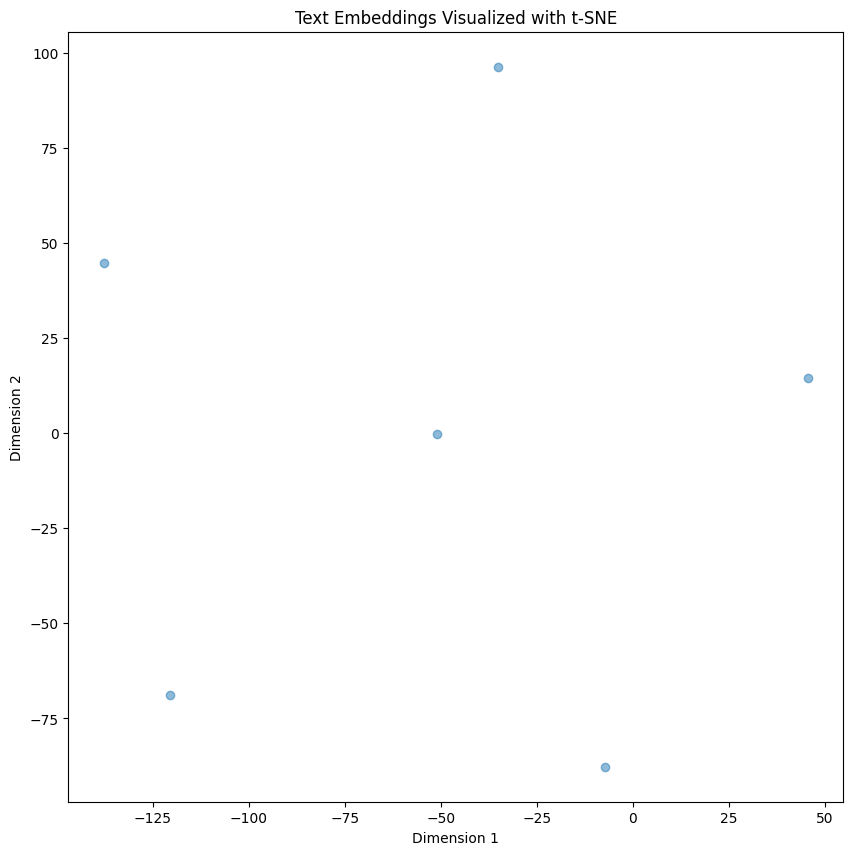

In [29]:
# Plotting
plt.figure(figsize=(10, 10))
x = vis_dims[:, 0]
y = vis_dims[:, 1]
plt.scatter(x, y, alpha=0.5)


plt.title("Text Embeddings Visualized with t-SNE")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()